In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from torch_geometric.datasets import PPI
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import AddSelfLoops
import dataset

train_dataset = PPI(root='', split='train', transform=AddSelfLoops())
val_dataset = PPI(root='', split='val', transform=AddSelfLoops())
test_dataset = PPI(root='', split='test', transform=AddSelfLoops())

dataset.num_features = 50
dataset.num_labels = 121
dataset.train_loader = DataLoader(train_dataset, batch_size=2)
dataset.val_loader = DataLoader(val_dataset, batch_size=2)
dataset.test_loader = DataLoader(test_dataset, batch_size=2)

In [3]:
import torch
from models import GATv1PPI
from evaluation import evaluate
from device import device

seed = 42
model = GATv1PPI(dataset.num_features, dataset.num_labels)
model_state_dict = torch.load(f'weights/seed-{seed}/GATv1PPI', map_location=device)['model_state_dict']
model.load_state_dict(model_state_dict)

evaluate(model, dataset.test_loader)

(tensor(0.0582), tensor(0.9765))

In [4]:
from torch_geometric.utils import to_networkx

[test_graph] = list(dataset.test_loader)
test_graph_nx = to_networkx(test_graph)

print(test_graph)
print(test_graph_nx)

DataBatch(x=[5524, 50], edge_index=[2, 167500], y=[5524, 121], batch=[5524], ptr=[3])
DiGraph with 5524 nodes and 167500 edges


### Attention Distribution Analysis

In [5]:
from attention_entropy_visualisation import visualise_attention_entropy, AttentionVisualisationMode

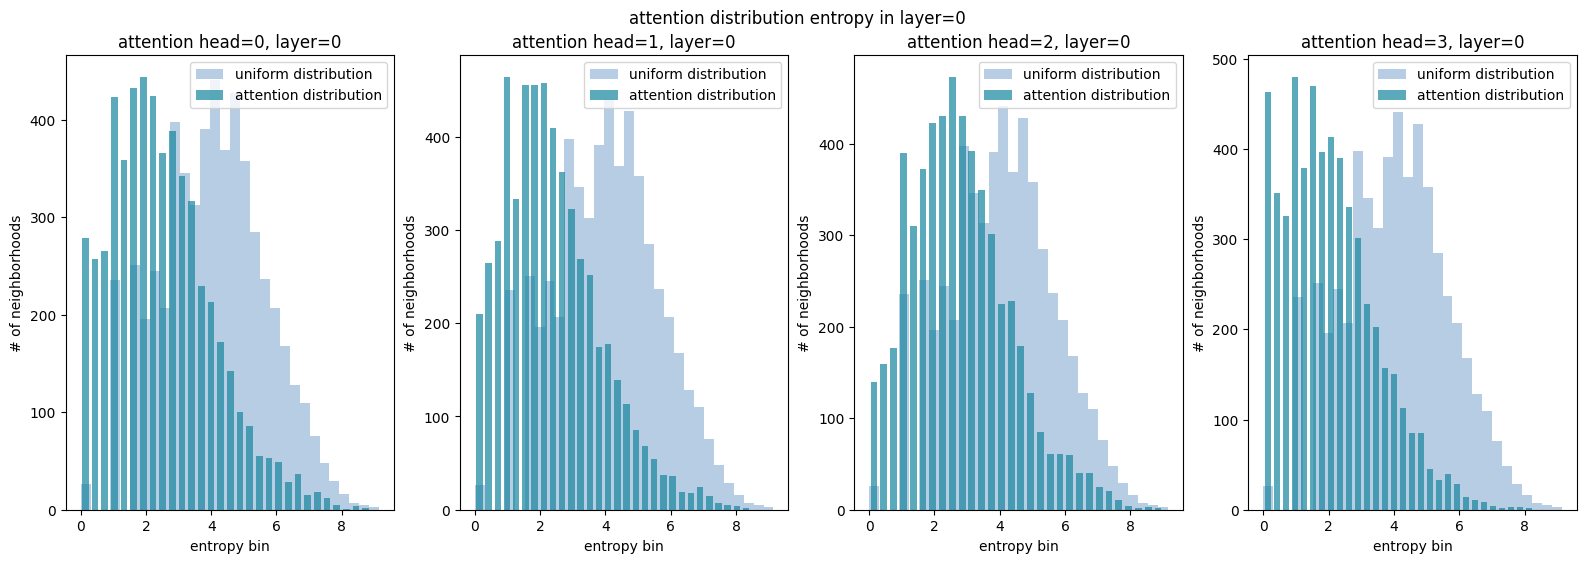

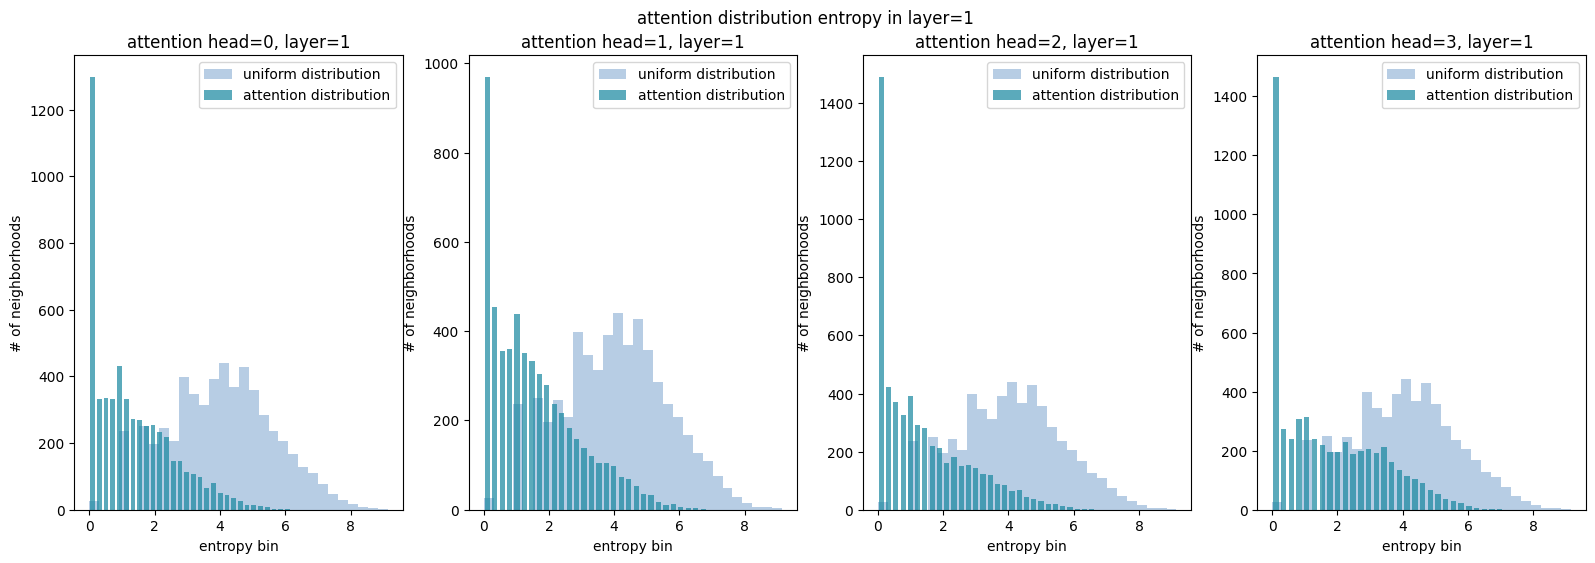

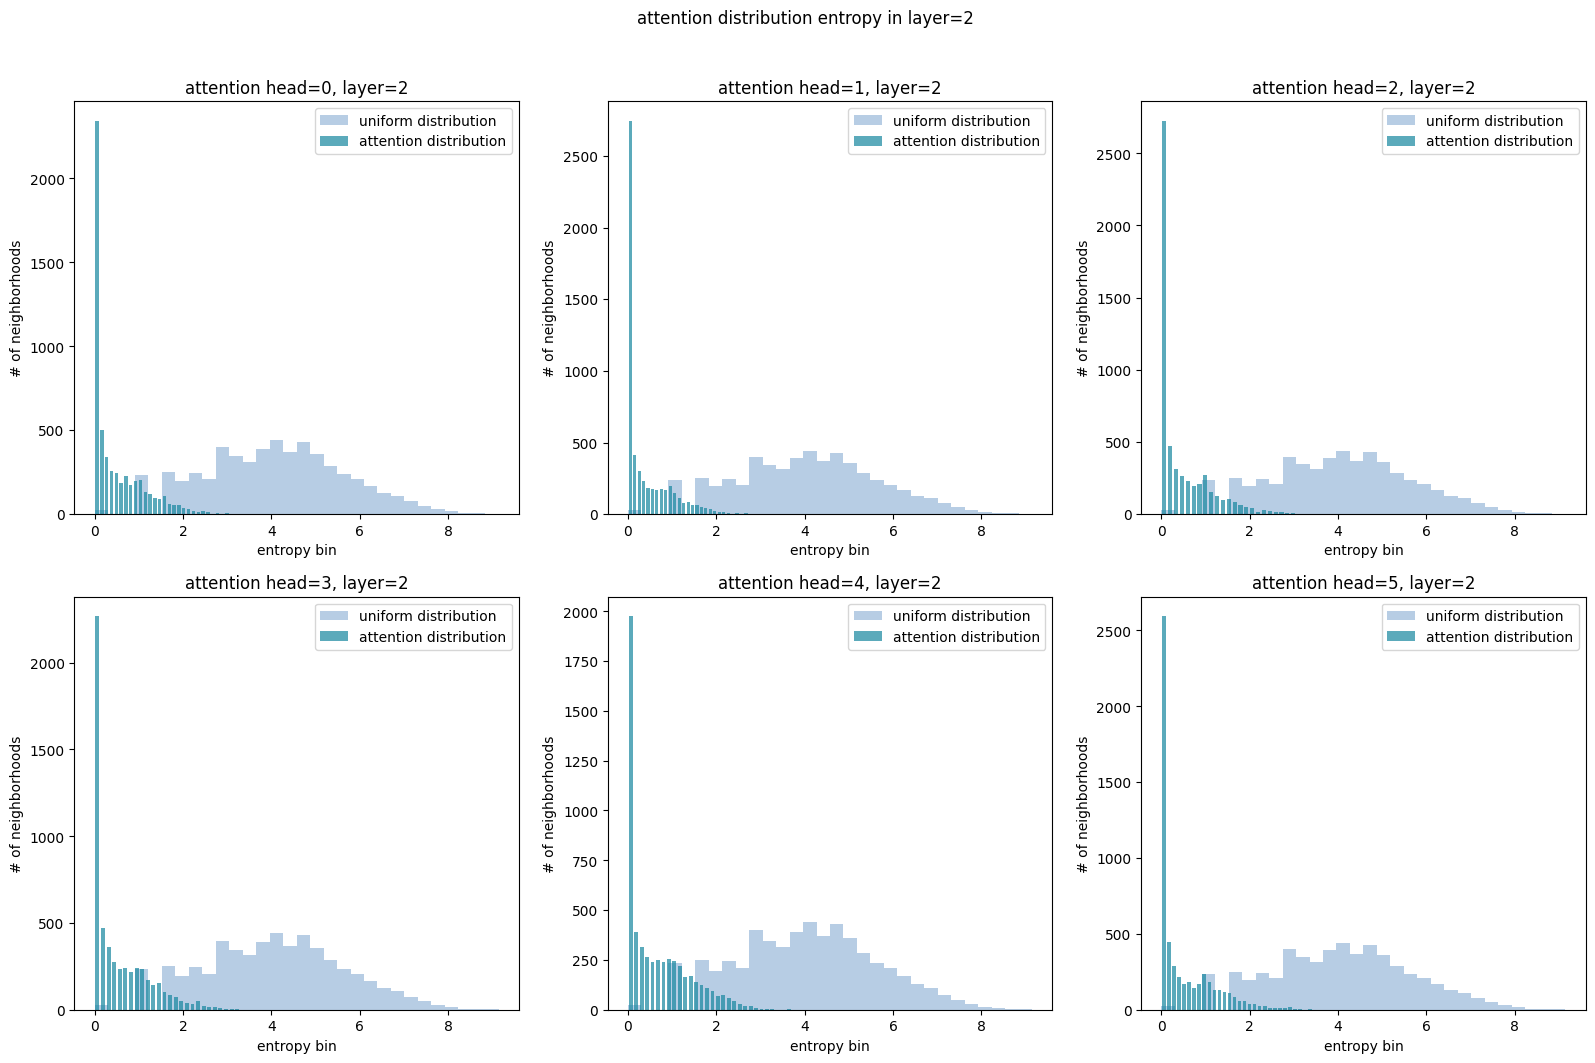

In [6]:
visualise_attention_entropy(model, test_graph, [4,4,6], AttentionVisualisationMode.PER_LAYER)

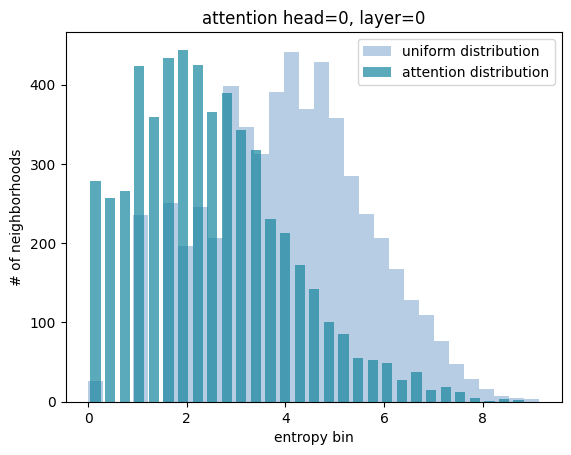

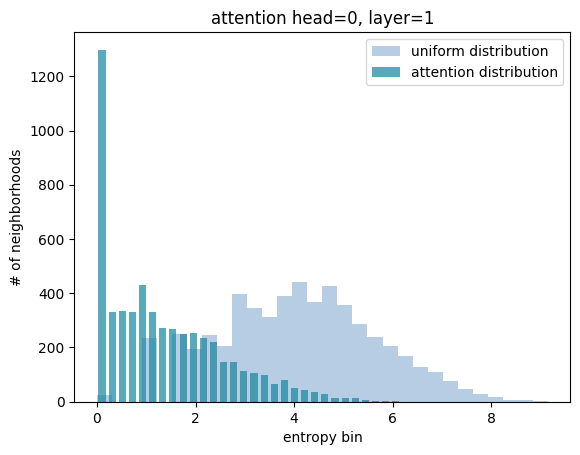

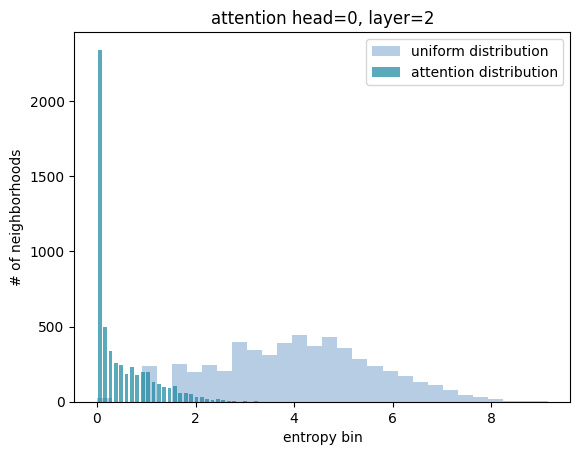

In [7]:
visualise_attention_entropy(model, test_graph, [1,1,1], AttentionVisualisationMode.PER_HEAD)

### Neighbourhood Attention Analysis

In [8]:
from node_degree_analysis import print_nodes_with_degs
from neighbourhood_analysis_visualisation import visualise_neighbourhoods_for, NeighbourhoodVisualisationMode

In [9]:
print_nodes_with_degs(test_graph_nx)

(853, 355)
(3946, 305)
(2210, 285)
(489, 270)
(1130, 245)
(4454, 235)
(857, 230)
(2184, 225)
(4750, 220)
(1829, 210)
(2308, 200)
(1994, 195)
(1026, 185)
(1269, 180)
(2233, 175)
(1993, 170)
(1030, 165)
(1990, 160)
(237, 155)
(3839, 150)
(209, 145)
(4847, 140)
(2798, 135)
(213, 130)
(377, 125)
(2715, 120)
(367, 115)
(1012, 110)
(2739, 105)
(342, 100)
(850, 95)
(2108, 90)
(217, 85)
(12, 80)
(423, 75)
(236, 70)
(1303, 65)
(458, 60)
(1456, 55)
(214, 50)
(14, 45)
(47, 40)
(86, 35)
(258, 30)
(2, 25)
(0, 20)
(30, 15)
(106, 10)
(29, 5)


In [10]:
nodes_to_visualise = [29, 106, 30, 0]

#### Report plots

neighbourhood stats for node=29: 
	max attention: 0.2869, min attention: 0.1214
neighbourhood stats for node=106: 
	max attention: 0.7445, min attention: 0.0015
neighbourhood stats for node=30: 
	max attention: 0.6546, min attention: 0.0062
neighbourhood stats for node=0: 
	max attention: 0.6502, min attention: 0.0000


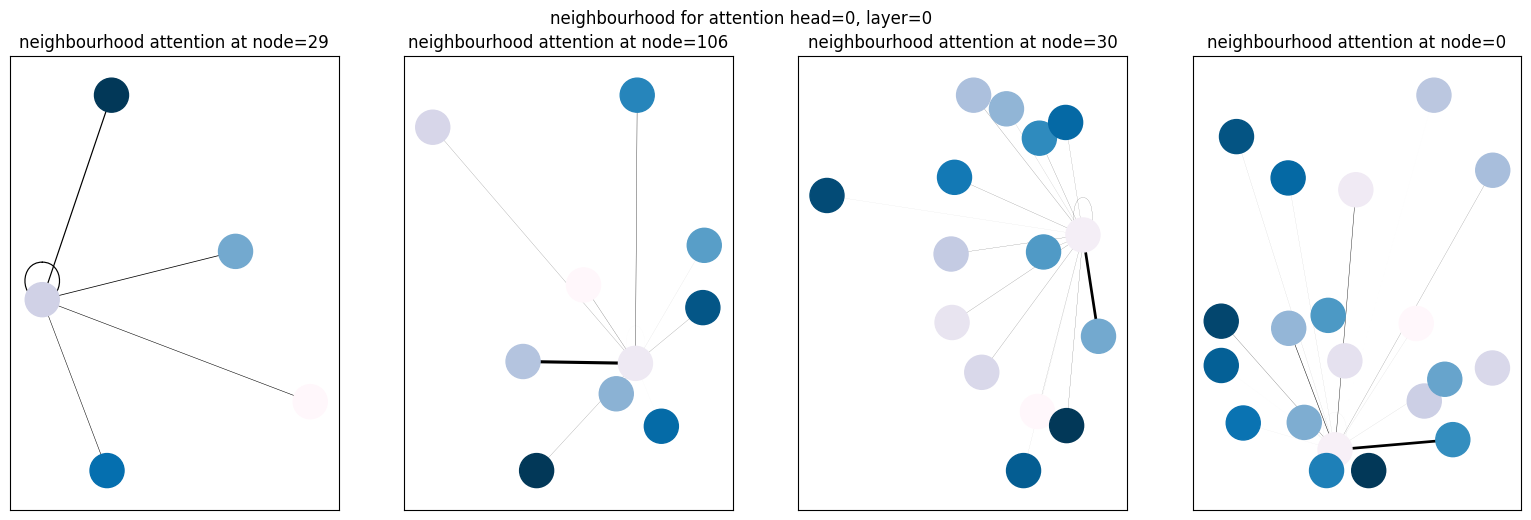

In [11]:
visualise_neighbourhoods_for(model, test_graph, 0, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.4588, min attention: 0.0099
neighbourhood stats for node=106: 
	max attention: 0.9114, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9998, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9124, min attention: 0.0000


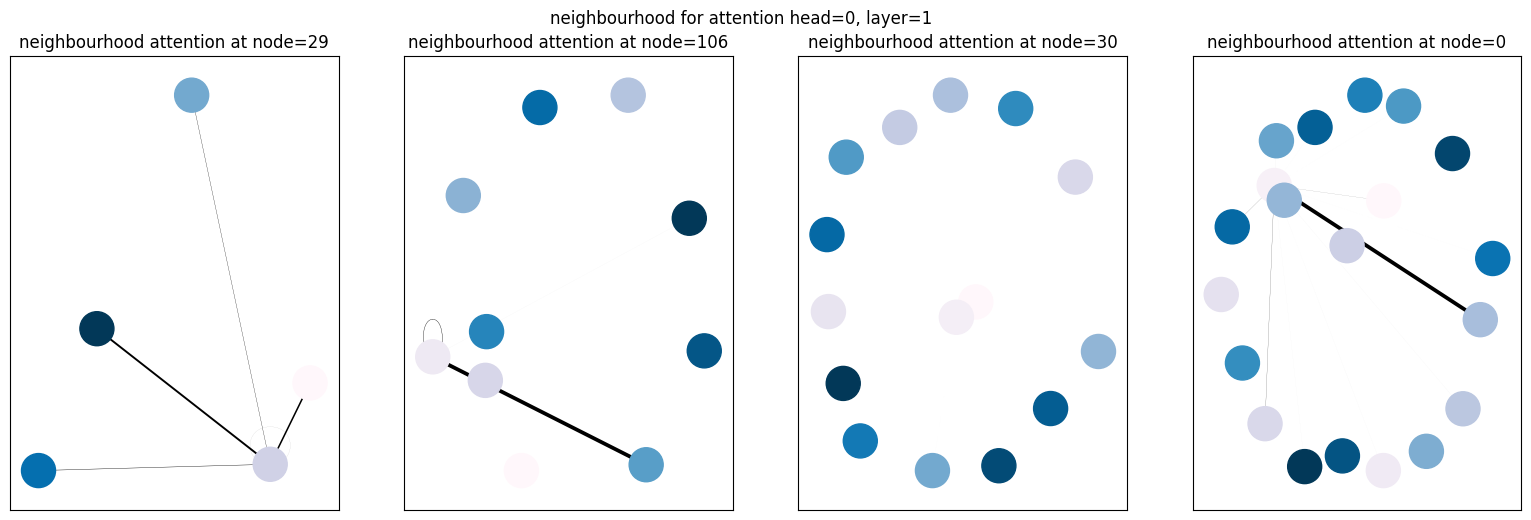

In [12]:
visualise_neighbourhoods_for(model, test_graph, 1, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.9625, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 1.0000, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9998, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9971, min attention: 0.0000


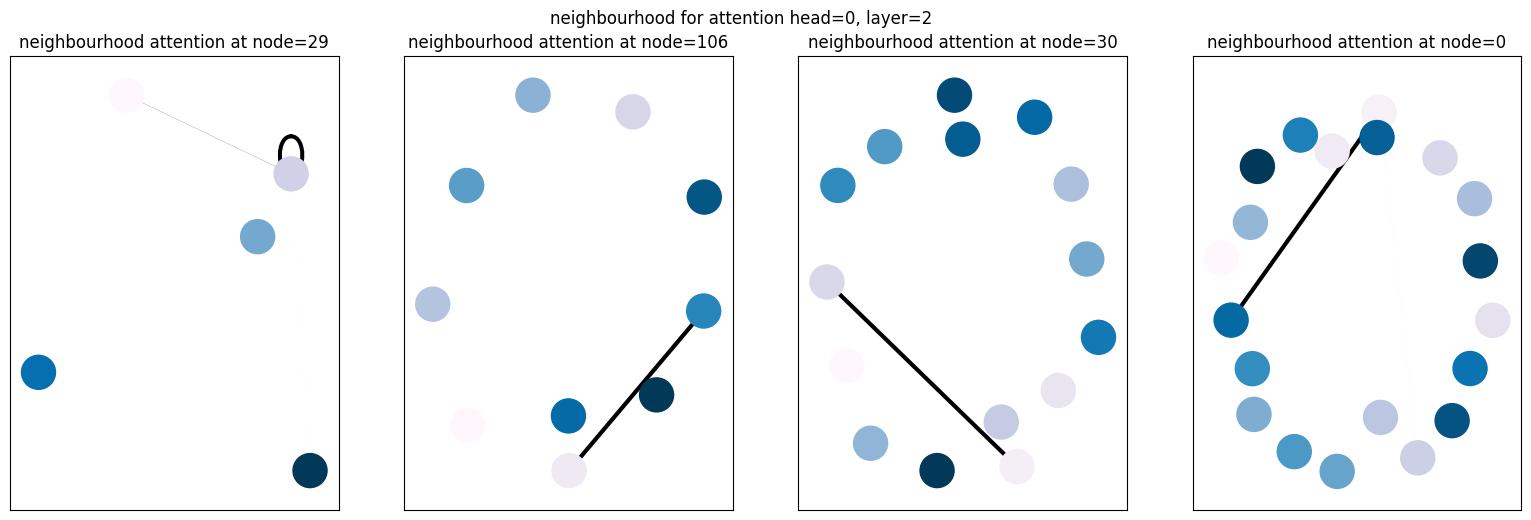

In [13]:
visualise_neighbourhoods_for(model, test_graph, 2, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.2869, min attention: 0.1214
neighbourhood stats for node=106: 
	max attention: 0.7445, min attention: 0.0015
neighbourhood stats for node=30: 
	max attention: 0.6546, min attention: 0.0062
neighbourhood stats for node=0: 
	max attention: 0.6502, min attention: 0.0000


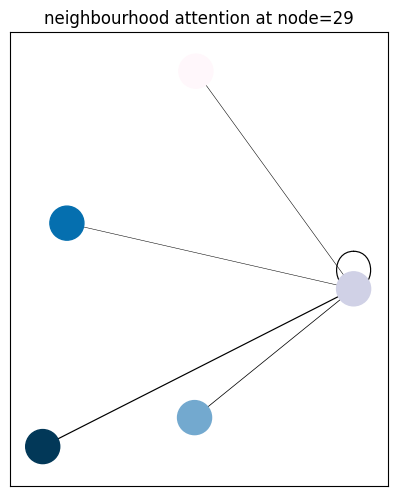

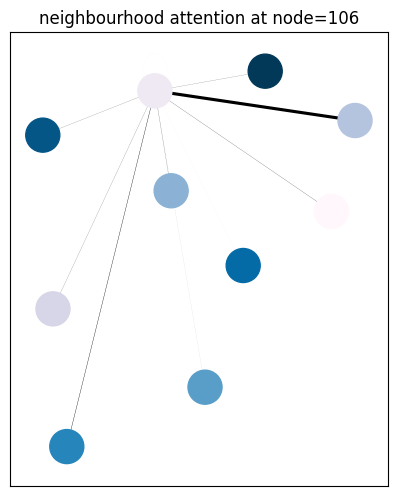

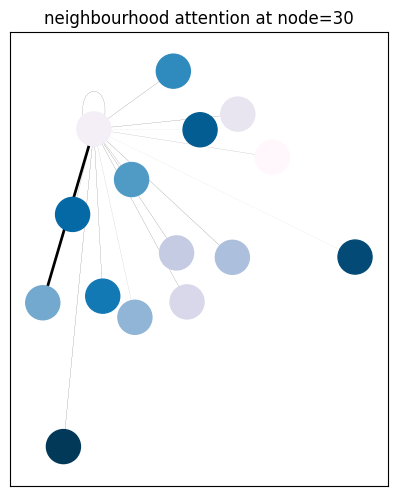

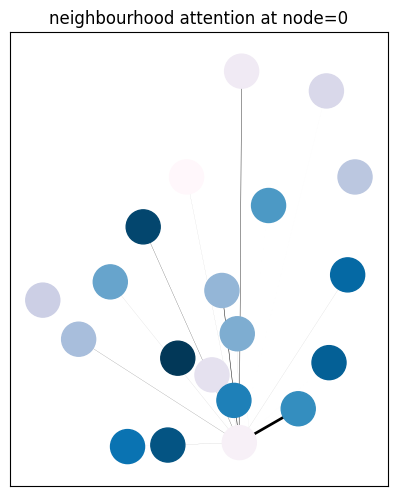

In [14]:
visualise_neighbourhoods_for(model, test_graph, 0, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_NODE)

neighbourhood stats for node=29: 
	max attention: 0.4588, min attention: 0.0099
neighbourhood stats for node=106: 
	max attention: 0.9114, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9998, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9124, min attention: 0.0000


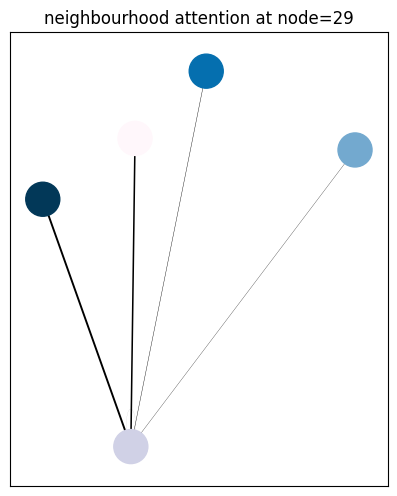

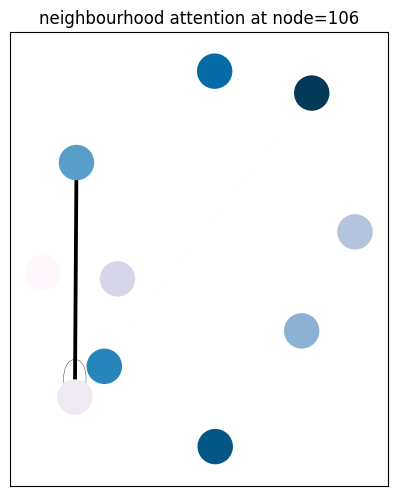

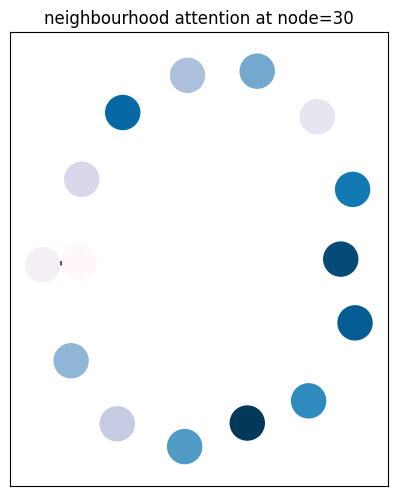

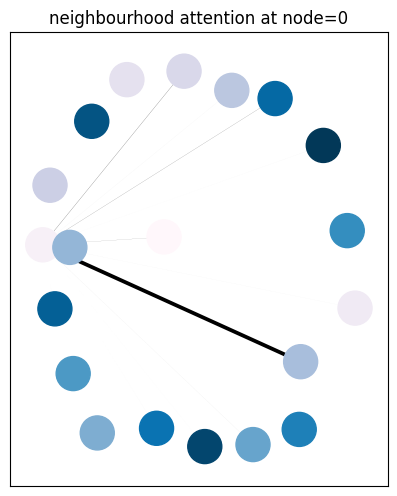

In [15]:
visualise_neighbourhoods_for(model, test_graph, 1, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_NODE)

neighbourhood stats for node=29: 
	max attention: 0.9625, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 1.0000, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9998, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9971, min attention: 0.0000


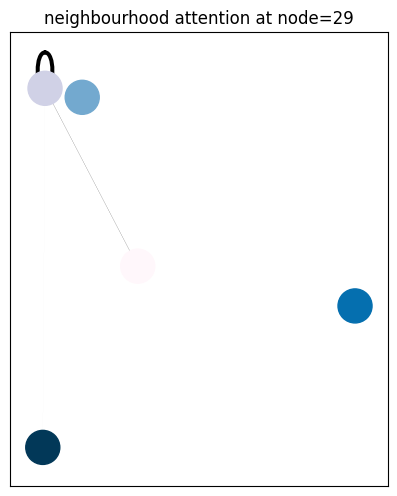

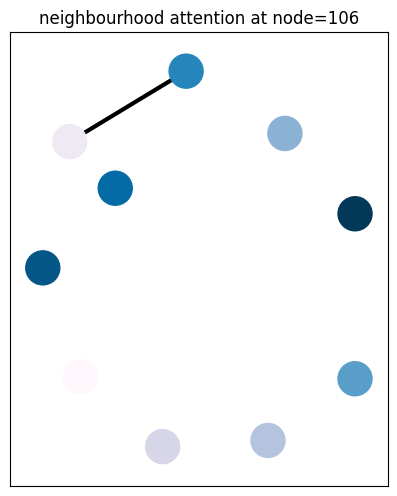

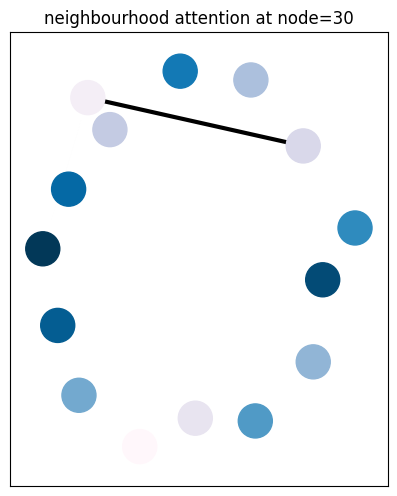

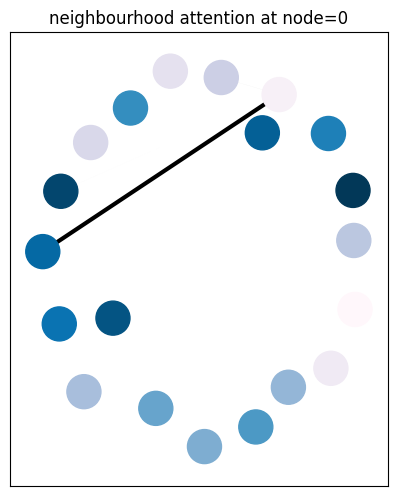

In [16]:
visualise_neighbourhoods_for(model, test_graph, 2, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_NODE)

#### Neighbourhood attention learned by the classification layer heads 

neighbourhood stats for node=29: 
	max attention: 0.9625, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 1.0000, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9998, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9971, min attention: 0.0000


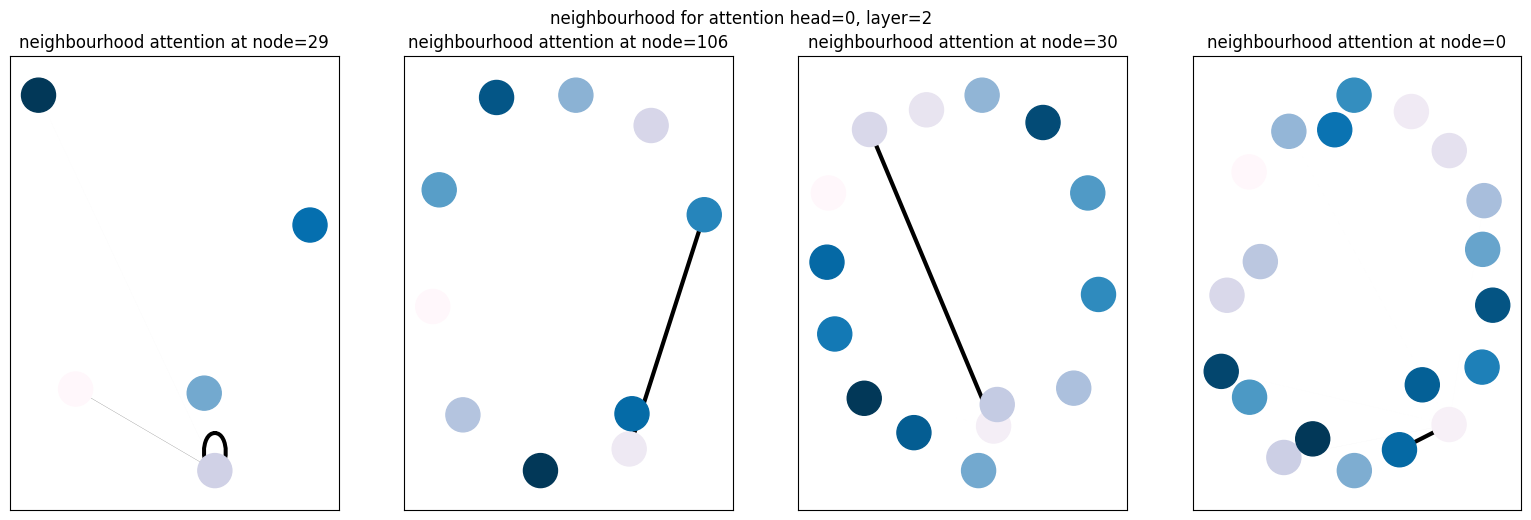

In [17]:
visualise_neighbourhoods_for(model, test_graph, 2, 0, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.8087, min attention: 0.0001
neighbourhood stats for node=106: 
	max attention: 1.0000, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9388, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.7381, min attention: 0.0000


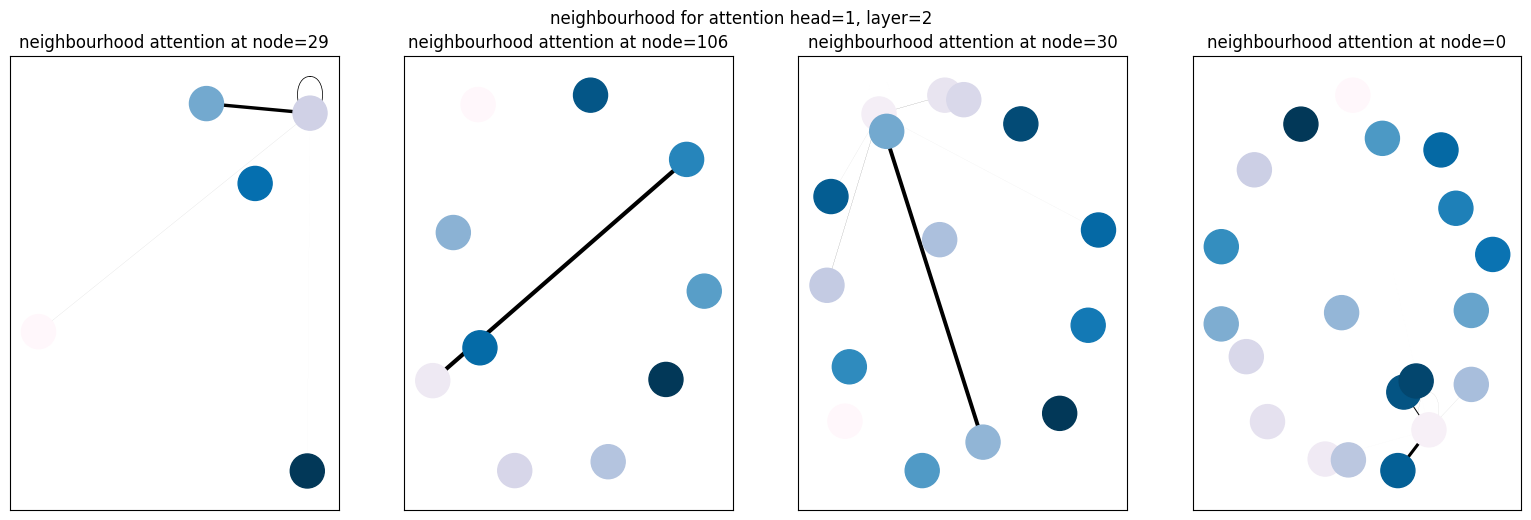

In [18]:
visualise_neighbourhoods_for(model, test_graph, 2, 1, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 1.0000, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 0.3755, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.8283, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.8535, min attention: 0.0000


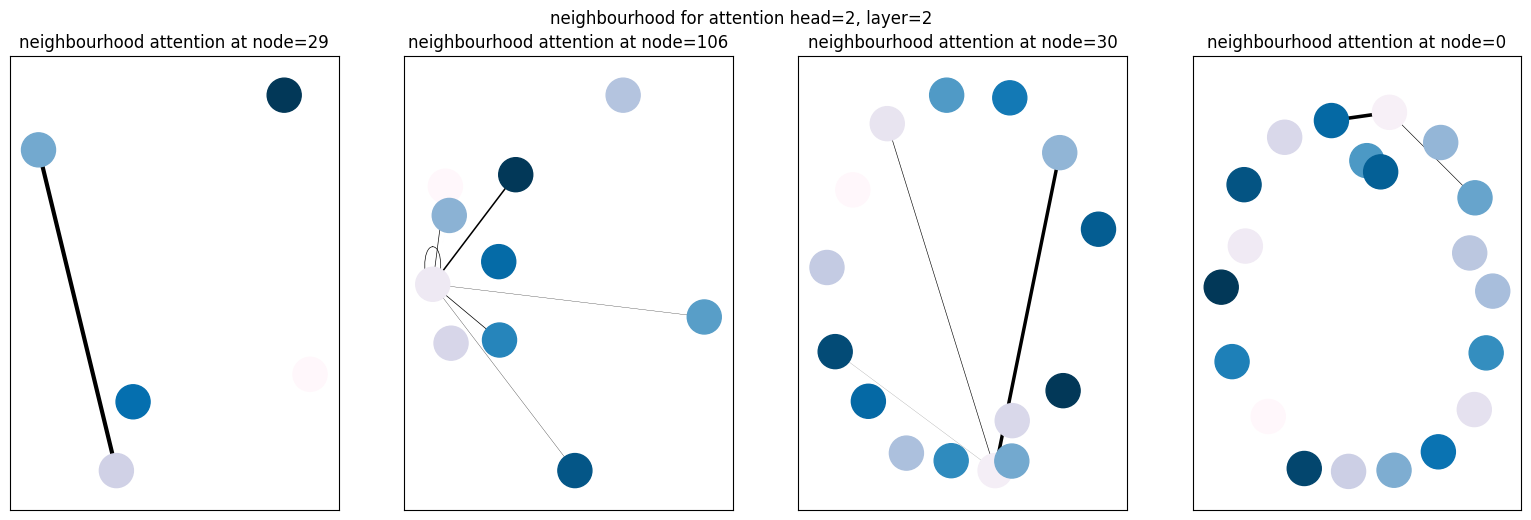

In [19]:
visualise_neighbourhoods_for(model, test_graph, 2, 2, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.9860, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 0.8895, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9913, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.6299, min attention: 0.0000


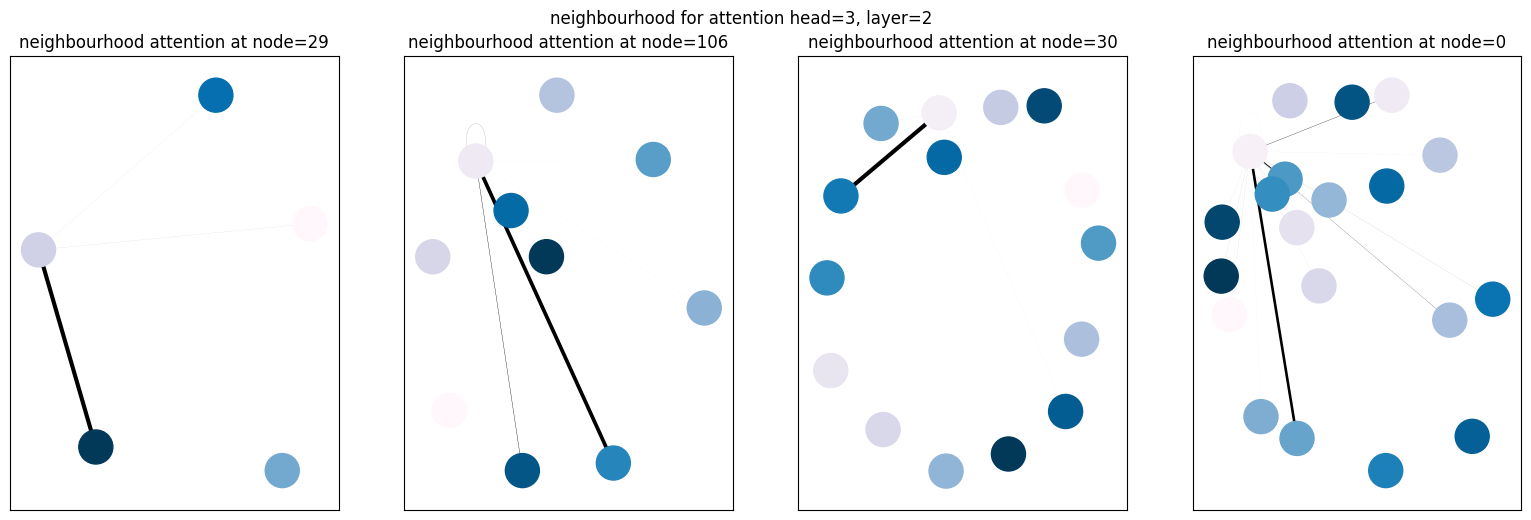

In [20]:
visualise_neighbourhoods_for(model, test_graph, 2, 3, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.9996, min attention: 0.0000
neighbourhood stats for node=106: 
	max attention: 0.8831, min attention: 0.0001
neighbourhood stats for node=30: 
	max attention: 0.4761, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.9685, min attention: 0.0000


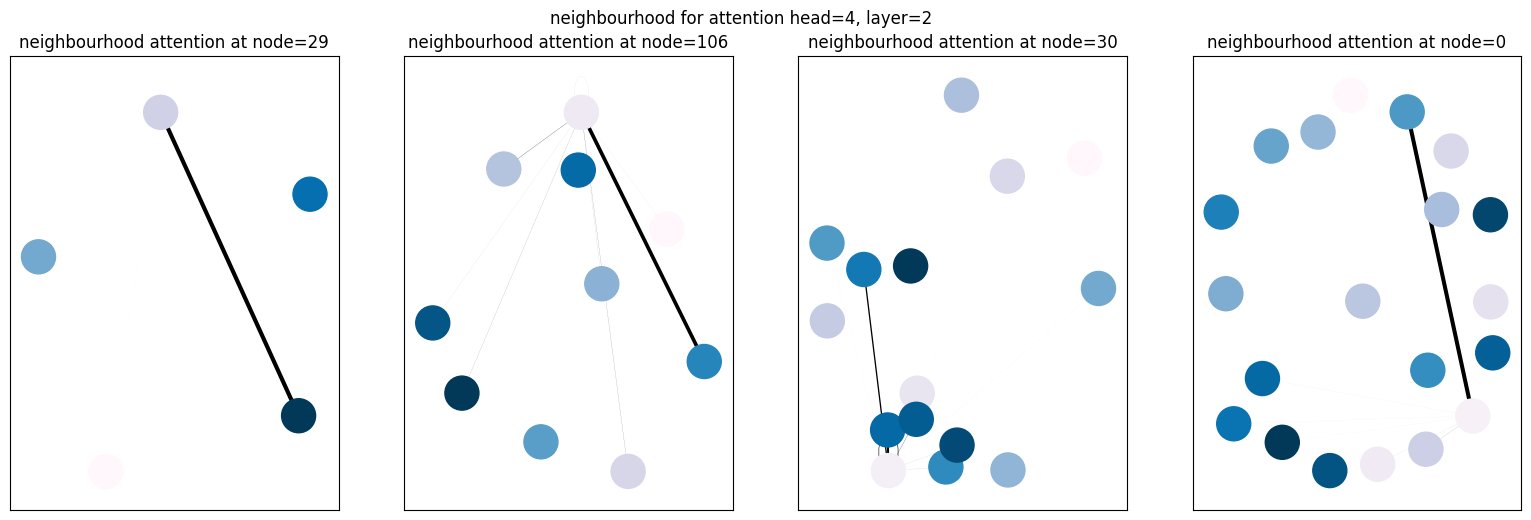

In [21]:
visualise_neighbourhoods_for(model, test_graph, 2, 4, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)

neighbourhood stats for node=29: 
	max attention: 0.9415, min attention: 0.0004
neighbourhood stats for node=106: 
	max attention: 1.0000, min attention: 0.0000
neighbourhood stats for node=30: 
	max attention: 0.9999, min attention: 0.0000
neighbourhood stats for node=0: 
	max attention: 0.6043, min attention: 0.0000


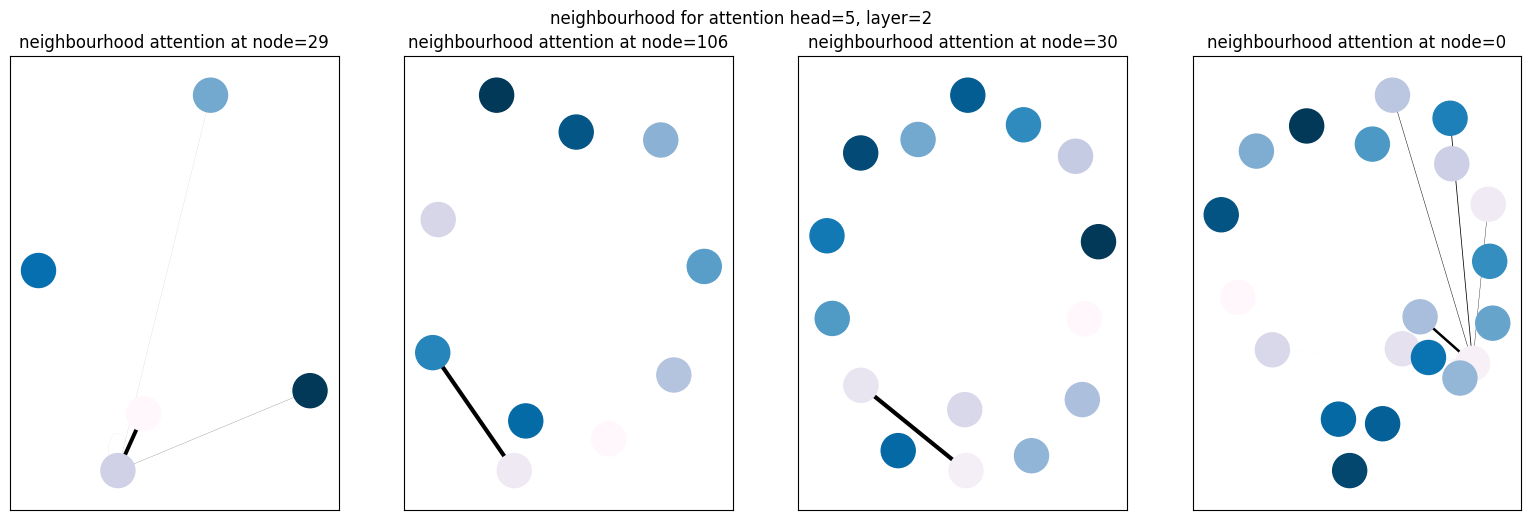

In [22]:
visualise_neighbourhoods_for(model, test_graph, 2, 5, nodes_to_visualise, NeighbourhoodVisualisationMode.PER_HEAD)